In [1]:
import dbscan_lib as dbs

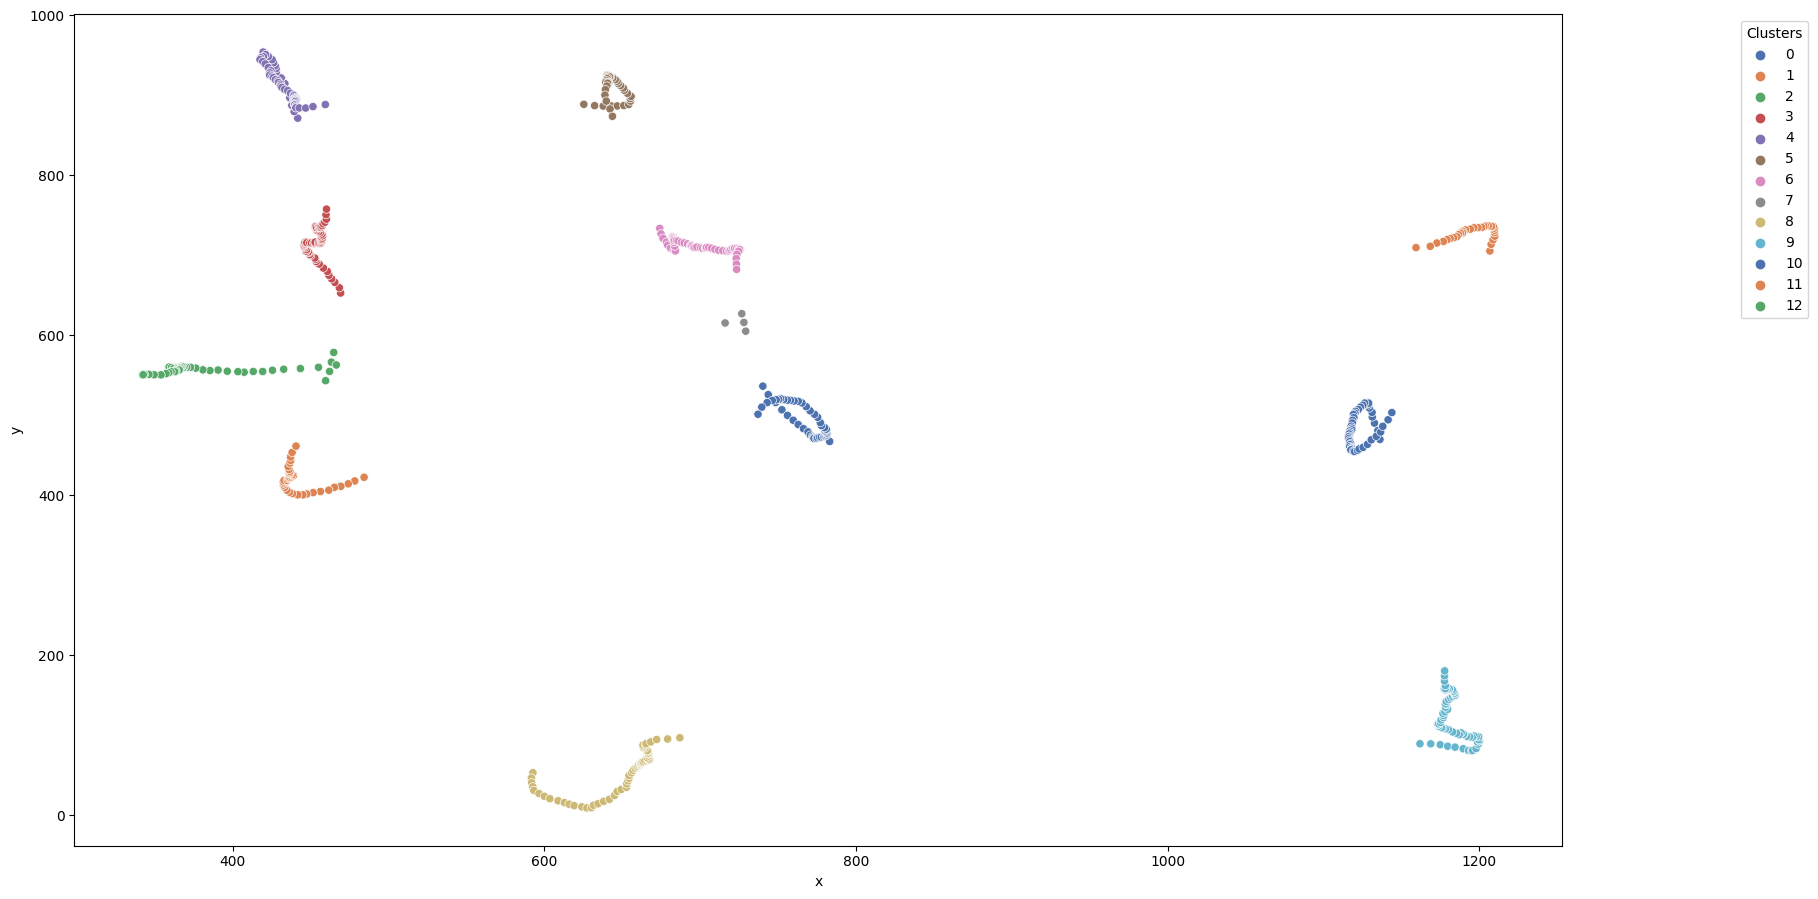

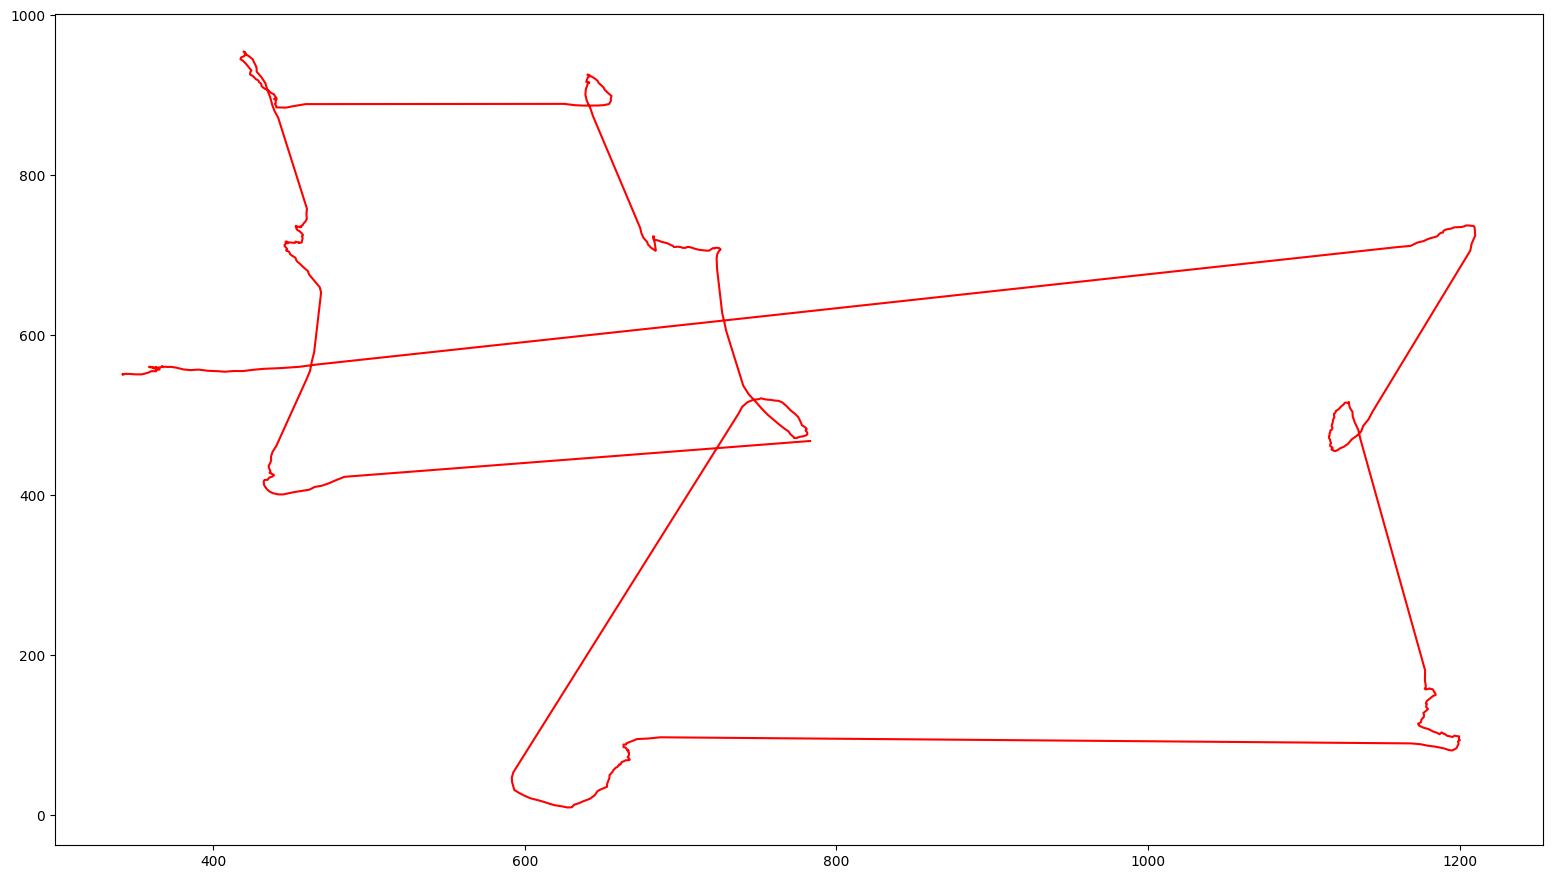

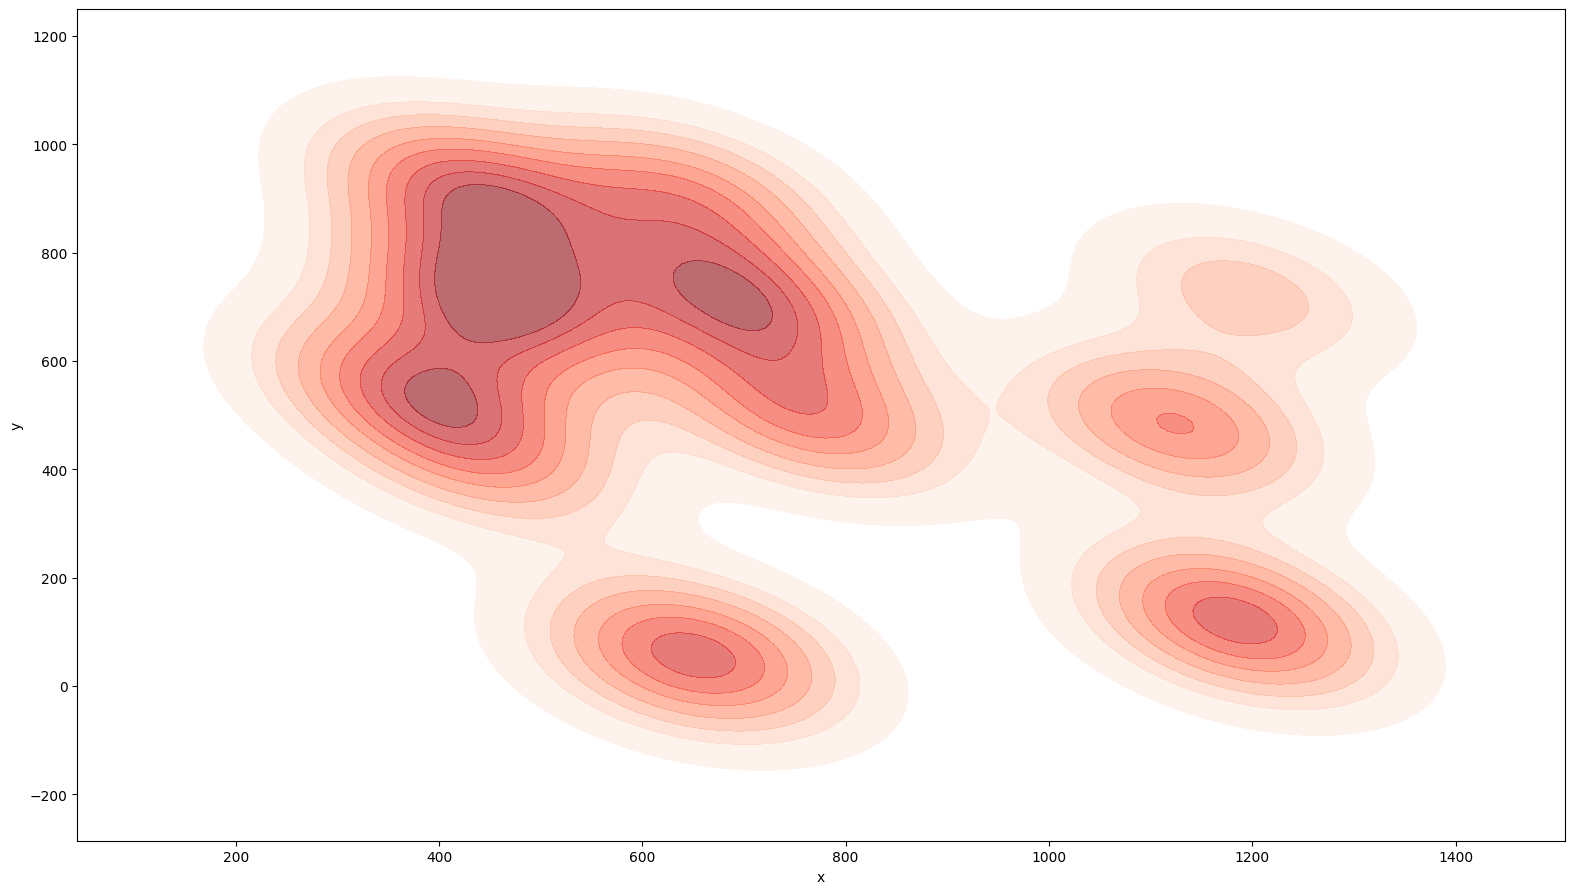

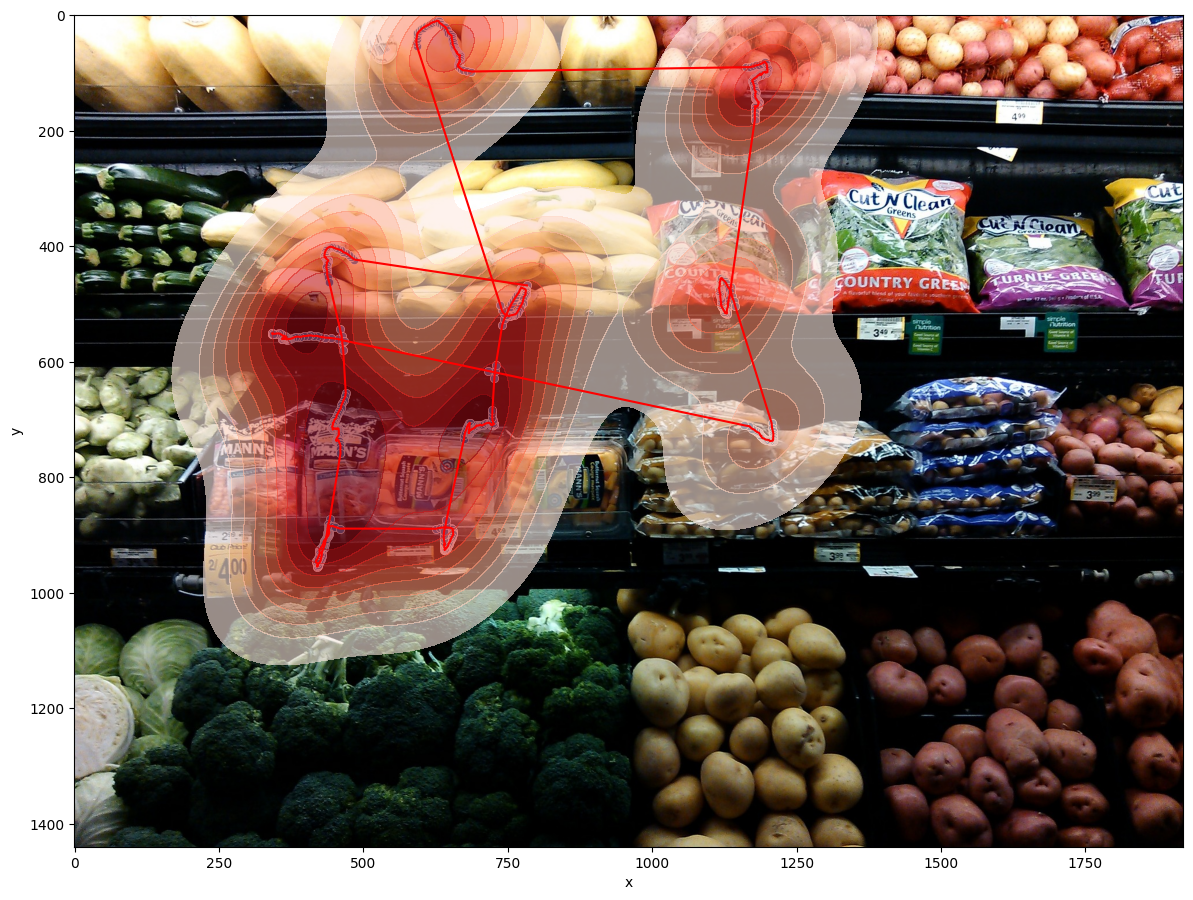

In [2]:
obj = dbs.dbscanAlgo()
obj.run()

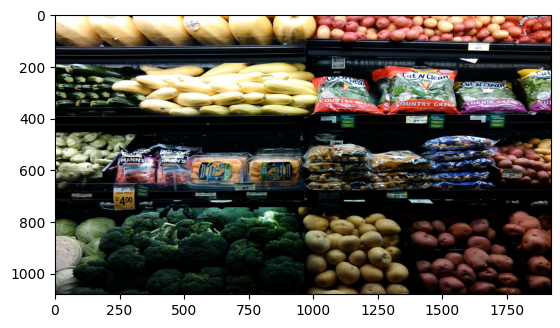

In [7]:
import cv2
import matplotlib.pyplot as plt 


img                = cv2.imread("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/test_images/grocery-412912_1920.jpg")
dsize              = (1920, 1080)
image              = cv2.resize(img, dsize, interpolation =  cv2.INTER_LINEAR)
image              = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.imwrite("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/test_images/grocery.jpg", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

plt.imshow(image)
plt.show()

#### DSCAN Method

In [ ]:
df = pd.read_csv('../dataset/gaze_points.csv')
X_train = df[['x', 'y']]

clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

DBSCAN_dataset.Cluster.value_counts().to_frame()


outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

df = DBSCAN_dataset[DBSCAN_dataset['Cluster'] !=-1]

plt.figure(figsize=(16, 9))
p = sns.scatterplot(data = df, x = "x", y = "y", hue = df.Cluster, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Clustering'); 
plt.show()


df1 = pd.read_csv('../dataset/gaze_points.csv')
df1 = df1.drop(['Unnamed: 0', 'timestamp'], axis=1)


# Plot the data
plt.figure(figsize=(16, 9))
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1])
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Gaze Points'); 

In [ ]:
# 2D density plot:
plt.figure(figsize=(16, 9))
sns.kdeplot(data = df, x="x", y="y", cmap="Reds", fill=True)
plt.title('Gaze Points Heatmap')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread("../test_images/grocery-412912_1920.jpg")
fig, ax = plt.subplots(figsize = (16, 9))
p = sns.scatterplot(data = df, x = "x", y = "y")

sns.kdeplot(data = df, x = "x", y = "y", cmap = "Reds", fill = True, clip = ((0, 1920), (0, 1080)), alpha=.6)
ax.plot(df1.iloc[:, 0], df1.iloc[:, 1], 'r', linestyle = '-')


ax.imshow(img, extent=[0, 1920, 0, 1080])
ax.plot()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#2D Gaussian function
def twoD_Gaussian((x, y), xo, yo, sigma_x, sigma_y):
    a = 1./(2*sigma_x**2) + 1./(2*sigma_y**2)
    c = 1./(2*sigma_x**2) + 1./(2*sigma_y**2)
    g = np.exp( - (a*((x-xo)**2) + c*((y-yo)**2)))
    return g.ravel()


def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap


#Use base cmap to create transparent
mycmap = transparent_cmap(plt.cm.Reds)


# Import image and get x and y extents
I = Image.open('./deerback.jpg')
p = np.asarray(I).astype('float')
w, h = I.size
y, x = np.mgrid[0:h, 0:w]

#Plot image and overlay colormap
fig, ax = plt.subplots(1, 1)
ax.imshow(I)
Gauss = twoD_Gaussian((x, y), .5*x.max(), .4*y.max(), .1*x.max(), .1*y.max())
cb = ax.contourf(x, y, Gauss.reshape(x.shape[0], y.shape[1]), 15, cmap=mycmap)
plt.colorbar(cb)
plt.show()